## Plotting a Detrended Signal

In [10]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from scipy import stats
from glob import glob

## [Identifying the optimal threshold at which to filter the signal](https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71)

In [11]:
data_dir = '../../data/'

data_file_list = glob(data_dir + '*.wav')
data_file_list[0]

'../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav'

Text(0.5, 0, 'Percentage of Filter')

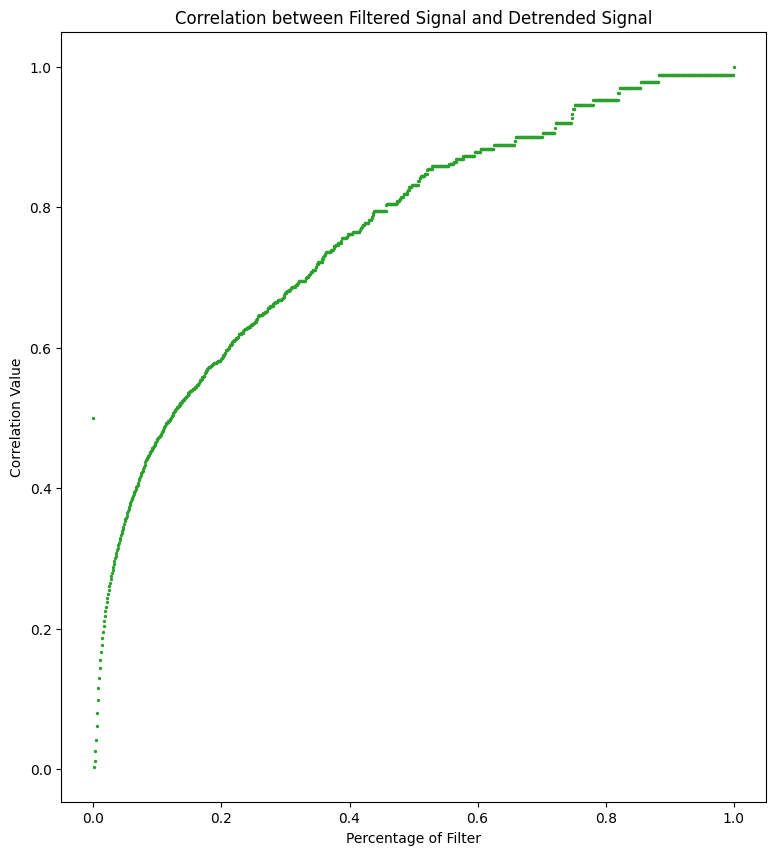

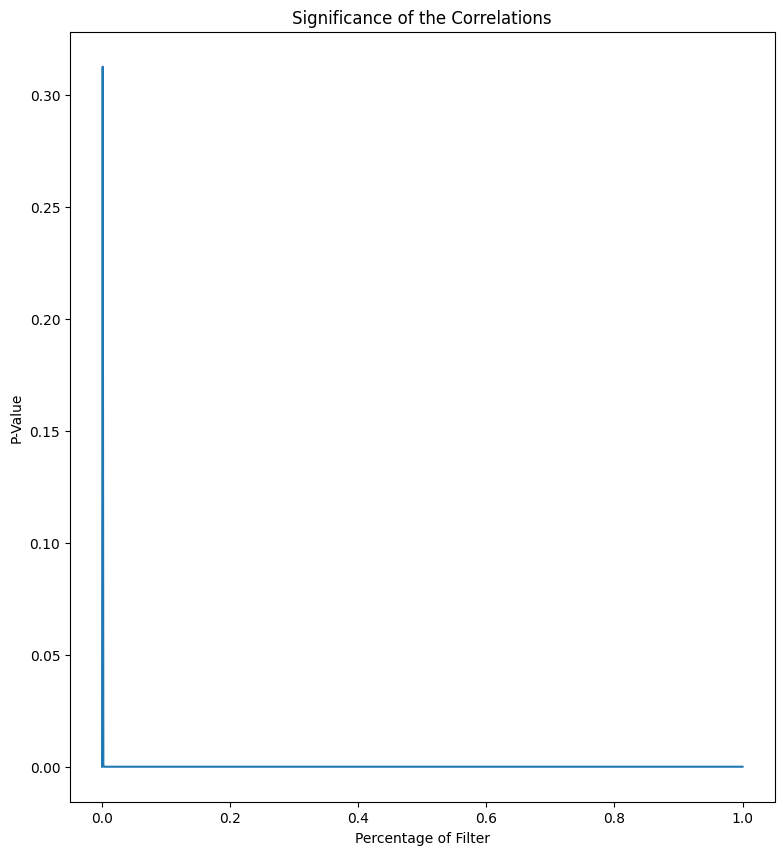

In [12]:
SAMPLE_RATE = 20000
raw_neural_data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)

# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)

# FFT = np.fft.fft(detrend_y)
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT)/2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr/2), step=(sr/N))

def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0:len(FFT)//2]) / len(freq_bins)
                              ).max()
    # print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2*filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold]=0
    return filtered_FFT

percentage_list = np.linspace(0, 1, num=1000)

p_values = []
correlation_values = []
for percentage in percentage_list:
    fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)    
    filtered_signal = np.fft.ifft(fft_filtered_custom)
    residuals = stats.spearmanr(detrend_y, detrend_y - filtered_signal)
    p_values.append(residuals.pvalue)
    correlation_values.append(residuals.correlation)


plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(percentage_list, correlation_values, s=2, color='tab:green')
plt.title('Correlation between Filtered Signal and Detrended Signal')
plt.ylabel('Correlation Value')
plt.xlabel('Percentage of Filter')

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.plot(percentage_list,p_values)
plt.title('Significance of the Correlations')
plt.ylabel('P-Value')
plt.xlabel('Percentage of Filter')